---
title: "Calc 1: Simple Constrained Optimization"
date: 2023-07-04
draft: false
categories: ['Notes on Methods']
tags: ['Python', 'Math', 'Calculus']
math: true
---

In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

The following are my notes on a basic calculus 1 homework question. I liked the question a lot, so decided to write out it all out for my future use.

Question: **If 2000 square centimeters of material is available to make a box with a square base and an open top, what is the largest box that you can possibly create?**

The following are the core pieces of the question:  
1. *2000 square centimeters of material is available to create a box*

This means that the surface area of whatever we create will be 2000 cm^2  

2. *The box has a square base*

This means that the we can equate base and width and just use one variable, $x$, for all sides of the box except height, $b=w=x$  

3. *The box has an open top*

The resulting box is pictured below, with the red plane denoting the open box.

{{< details "Code for open-box figure" >}}

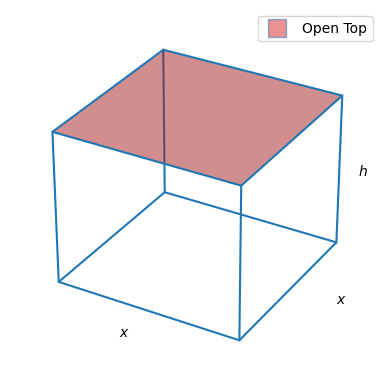

In [83]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)

h = 100

ax.plot_surface(X,Y, one*h, alpha=.5, color='tab:red')
ax.plot_wireframe(X,Y,one*h, alpha=1)
ax.plot_wireframe(X,Y,-one*h, alpha=1)

ax.plot(-np.array([1, 1]), np.array([1, 1]), np.array([-h, h]), c="tab:blue")
ax.plot(np.array([1, 1]), -np.array([1, 1]), np.array([-h, h]), c="tab:blue")
ax.plot(-np.array([1, 1]), -np.array([1, 1]), np.array([-h, h]), c="tab:blue")
ax.plot(np.array([1, 1]), np.array([1, 1]), np.array([-h, h]), c="tab:blue")

ax.plot([], [], "s", alpha=.5, markeredgecolor="tab:blue", markersize=13, c="tab:red", label="Open Top")
ax.legend()

ax.axis("off")

ax.text(0, -1.5, -h, r"$x$")
ax.text(1.5, 0, -h, r"$x$")
ax.text(1.2, 1, 0, r"$h$");

{{< /details >}}



This is a fairly straightforward constrained optimization function. We want to maximize the volume of an open box -- $V(x, h) = hx^2$ (the fact that the box is open makes no difference for the volume) -- but within the constraint that the surface area of the open box -- $A(x, h)$ -- not exceed 2,000 $cm^2$. We establish what $A(x, h)$ looks like in the case of an open box below.

{{< details "Code for surface-area figure" >}}

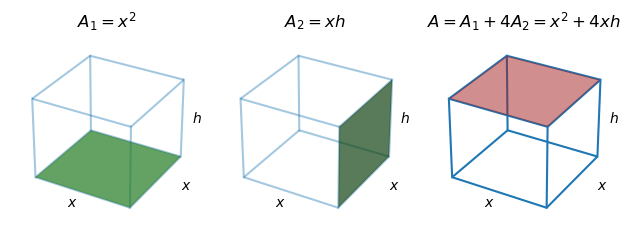

In [84]:
fig, ax = plt.subplots(1, 3, subplot_kw={"projection": "3d"})
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)


def plot_ax(ax, alpha=1):
    ax.plot_wireframe(X,Y,one*h, alpha=alpha)
    ax.plot_wireframe(X,Y,-one*h, alpha=alpha)

    ax.plot(-np.array([1, 1]), np.array([1, 1]), np.array([-h, h]), c="tab:blue", alpha=alpha)
    ax.plot(np.array([1, 1]), -np.array([1, 1]), np.array([-h, h]), c="tab:blue", alpha=alpha)
    ax.plot(-np.array([1, 1]), -np.array([1, 1]), np.array([-h, h]), c="tab:blue", alpha=alpha)
    ax.plot(np.array([1, 1]), np.array([1, 1]), np.array([-h, h]), c="tab:blue", alpha=alpha)
    ax.axis("off")
    ax.text(0, -1.5, -h, r"$x$")
    ax.text(1.5, 0, -h, r"$x$")
    ax.text(1.2, 1, 0, r"$h$")

plot_ax(ax[0], .4)
ax[0].plot_surface(X,Y, -one*h, alpha=.7, color='tab:green')
ax[0].set_title(r"$A_1=x^2$")

plot_ax(ax[1], .4)
ax[1].plot_surface(np.array([[1, 1],[1, 1]]),
                np.array([[-1, -1], [1, 1]]),
                np.array([[h, -h], [h, -h]]),
                alpha=.7,
                color='tab:green')
ax[1].set_title(r"$A_2=xh$")


plot_ax(ax[2])
ax[2].plot_surface(X,Y, one*h, alpha=.5, color='tab:red')
ax[2].set_title(r"$A=A_1 + 4A_2=x^2 + 4xh$")

                
fig.tight_layout()

{{< /details >}}

We have two multivariate functions: $A(x, h) = x^2 + 4xh$, and $V(x, h) = x^2h$, but to optimize, we will ideally just work with one, single variable function. We obtain that function via a two step process:  
1. Substitute our surface area constraint into $A(x, h)$ and find $h(x)$:
$$\begin{align}
2000 &= x^2 + 4xh \\\
2000 - x^2 &= 4xh \\\
h(x) &= \frac{2000 - x^2}{4x}
\end{align}$$
1. Substitute $h(x)$ into $V(x, h)$ to produce $V(x)$:
$$\begin{align}
V &= x^2 h \\\
V &= x^2 \left(\frac{2000 - x^2}{4x}\right) \\\
V &= x \left(\frac{2000 - x^2}{4}\right) \\\ 
V &= \frac{2000x - x^3}{4} \\\
V(x) &= 500x - \frac{1}{4}x^3
\end{align}$$
With this function in hand, we can find the value of $x$ that maximizes the volume -- we'll call this $x^\star$. Before we optimize, we'll establish the domain of our search.  
We know that the range of $V(x)$ is $0<V(x) \leq V(x^\star)$, and the domain of $V(x)$ is obtained as follows:  
$$\begin{align}
0 &< V \\\
0 &< 500x - \frac{1}{4}x^3 \\\
\frac{1}{4}x^3 &< 500x \\\
x^2 &< 2000 \\\
\end{align}$$ 
Note that x must be positive, so
$$\begin{align}
0 < x &< 20\sqrt{5}
\end{align}$$  

In other words, we are looking for the side length $x^\star \in (0, 20\sqrt{5})$ that will maximize the volume of our open box. We compute this objective function's first and second derivatives, $V'(x)$ and $V''(x)$, to find and analyze the optimal value. All resulting functions are plotted over the original function's domain below.

{{< details "Code for derivatives figure" >}}

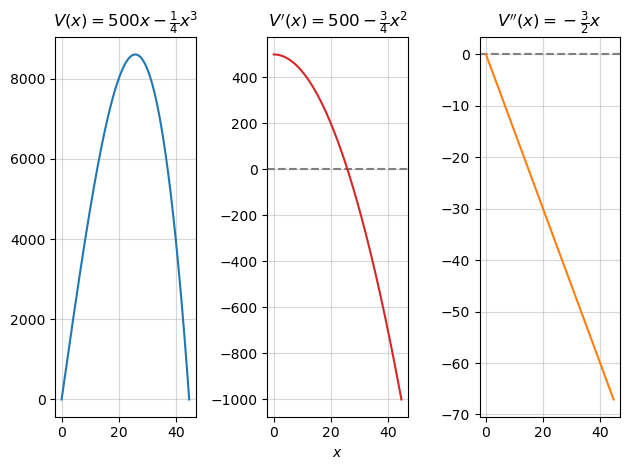

In [85]:
V = lambda x: 500*x - (x**3)*.25
V_1 = lambda x: 500 - (x**2)*.75
V_2 = lambda x: -1.5 * x
x = np.linspace(0, np.sqrt(2000), 1000)

fig, ax = plt.subplots(1, 3, sharex=True)
ax[0].plot(x, V(x))
ax[0].grid(alpha=.5)
ax[0].set_title(r"$V(x) = 500x - \frac{1}{4}x^3$")

ax[1].axhline(0, color="grey", linestyle="--")
ax[1].plot(x, V_1(x), c="tab:red")
ax[1].grid(alpha=.5)
ax[1].set_xlabel(r"$x$")
ax[1].set_title(r"$V'(x) = 500 - \frac{3}{4}x^2$")

ax[2].axhline(0, color="grey", linestyle="--")
ax[2].plot(x, V_2(x), c="tab:orange")
ax[2].grid(alpha=.5)
ax[2].set_title(r"$V''(x) = -\frac{3}{2}x$")


fig.tight_layout();

{{< /details >}}  

To optimize the function and find the maximizing side length, we set $V'(x)=0$ to determine the $x$ at which the function $V(x)$ has a slope of zero:  
$$\begin{align}
0 &= V'(x) \\\
0 &= 500 - \frac{3}{4}x^2 \\\
\frac{3}{4}x^2 &= 500 \\\
x^2 &= \frac{2000}{3} \\\
x &= \frac{\sqrt{400 \times 5}}{\sqrt{3}} \\\
x &= \frac{20\sqrt{5} \sqrt{3}}{3} \\\
x &= \pm\frac{20\sqrt{15}}{3} \\\
\text{Given} \quad 0 &< x \\\
x &= \frac{20\sqrt{15}}{3} \\\
x^\star &\approx 25.82
\end{align}$$

In [86]:
x_critical = 20*np.sqrt(15)/3
x_critical

25.81988897471611

In [87]:
V_1(x_critical)

0.0

We proceed to substitute this value into the second derivative to analyze this critical point and determine whether $V(x^\star)$ is a maximum volume or a minimum. Thus $V''(x^\star)$ is:

In [88]:
V_2(x_critical)

-38.72983346207417

Given that $V''(x^\star)<0$, we can confirm that the second derivative is "concave down," and thus $V(x^\star)$ represents a maximum value. **We conclude that the maximum possible volume of an open box with a surface area of 2,000 c^2 is**:  


In [89]:
print(V(x_critical), "cm^3")

8606.629658238704 cm^3


---

## A note on the second derivative test
 
When we determined $V''(x^\star)<0$, we determined that coming off of this critical value, the slope of the function is decreasing -- we are *coming down* from a maximum. In the figure below, the critical value is plotted as a black point. It's clear that if we were to move slightly to the right of the critical value, the slope of the function would decrease, and we see this directly in the plots of the first and second derivatives.

{{< details "Code for critical-point figure" >}}

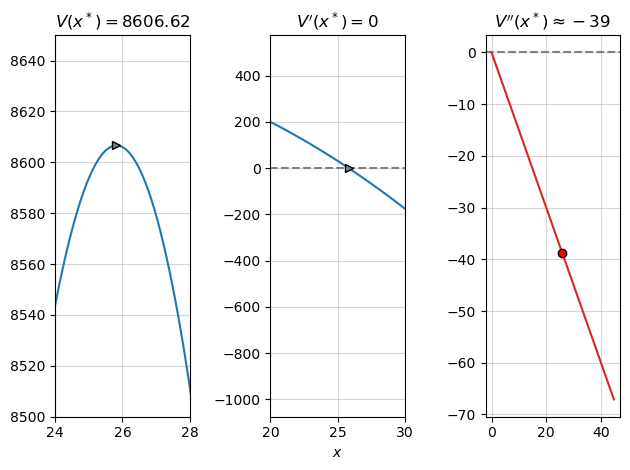

In [90]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(x, V(x))
ax[0].grid(alpha=.5)
ax[0].set_title(r"$V(x^*) = 8606.62$")
ax[0].set_ylim(8500,8650)
ax[0].set_xlim(24, 28)
ax[0].plot(x_critical, V(x_critical), ">", color="grey", markeredgecolor="black")

ax[1].axhline(0, color="grey", linestyle="--")
ax[1].plot(x, V_1(x), c="tab:blue")
ax[1].grid(alpha=.5)
ax[1].set_xlabel(r"$x$")
ax[1].set_title(r"$V'(x^*) = 0$")
ax[1].set_xlim(20, 30)
ax[1].plot(x_critical, V_1(x_critical), ">", color="grey", markeredgecolor="black")

ax[2].axhline(0, color="grey", linestyle="--")
ax[2].plot(x[V_2(x) > 0], V_2(x)[V_2(x) > 0], c="tab:green")
ax[2].plot(x[V_2(x) < 0], V_2(x)[V_2(x) < 0], c="tab:red")
ax[2].grid(alpha=.5)
ax[2].set_title(r"$V''(x^*) \approx -39$")
ax[2].plot(x_critical, V_2(x_critical), "o", alpha=1, color="red", markeredgecolor="black")

fig.tight_layout();

{{< /details >}}  


Expanding on this point, consider another arbitrary function that has more than one critical point, $f(x)=2x^3 - 100x^2$. In this case the function has one maximum and one minimum, so the second derivative test will be more important for analyzing each point. The function is plotted below, along with its first and second derivative.

{{< details "Code for arbitrary-function figure" >}}

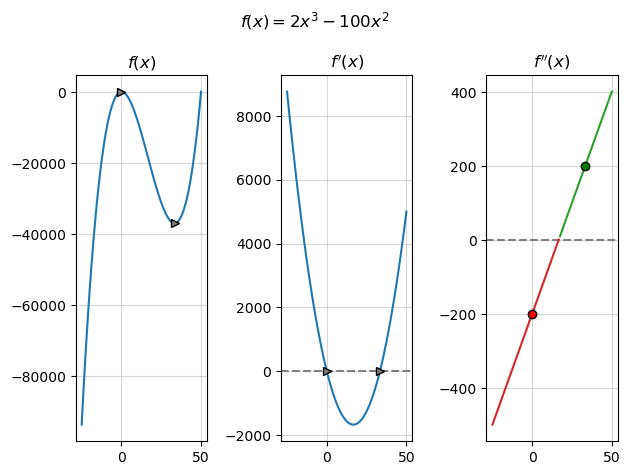

In [91]:
f = lambda x: 2*x**3 - 100*x**2
f_1 = lambda x: 6*x**2 - 200*x
f_2 = lambda x: 12*x - 200

x = np.linspace(-25, 50, 100)

fig, ax = plt.subplots(1, 3)
ax[0].plot(x, f(x))
ax[0].grid(alpha=.5)
ax[0].plot(100/3, f(100/3), ">", color="grey", markeredgecolor="black")
ax[0].plot(0, f(0), ">", color="grey", markeredgecolor="black")

ax[0].set_title(r"$f(x)$")

ax[1].axhline(0, color="grey", linestyle="--")
ax[1].plot(x, f_1(x), c="tab:blue")
ax[1].grid(alpha=.5)
ax[1].plot(100/3, f_1(100/3), ">", color="grey", markeredgecolor="black")
ax[1].plot(0, f_1(0), ">", color="grey", markeredgecolor="black")

ax[1].set_title(r"$f'(x)$")

ax[2].axhline(0, color="grey", linestyle="--")
ax[2].plot(x[f_2(x) > 0], f_2(x)[f_2(x) > 0], c="tab:green")
ax[2].plot(x[f_2(x) < 0], f_2(x)[f_2(x) < 0], c="tab:red")

ax[2].grid(alpha=.5)
ax[2].plot(100/3, f_2(100/3), "o", color="green", markeredgecolor="black")
ax[2].plot(0, f_2(0), "o", color="red", markeredgecolor="black")

ax[2].set_title(r"$f''(x)$")

fig.suptitle(r"$f(x) = 2x^3 - 100x^2$")

fig.tight_layout()

{{< /details >}}

If we were to want to maximize this function by taking the first derivative and solving for 0, we would find two critical values -- a maximum and a minimum. In this case, the second derivative test would be used to conclude which of these points is the maximum and which is the minimum. We substitute each critical value into the second derivative- $f''(x^\star)<0$ denotes the maximum (the slope of the function is decreasing off of this point), while $f''(x^\star)>0$ denotes the maximum (the slope of the function is increasing off of this point).